<a href="https://colab.research.google.com/github/stephintoto/ICT-ASSIGNMENTS/blob/main/class_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

In [3]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


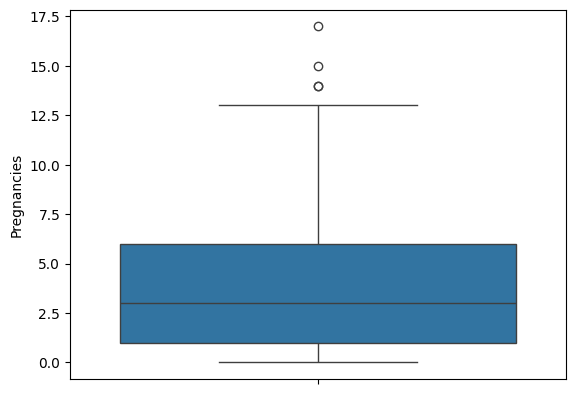

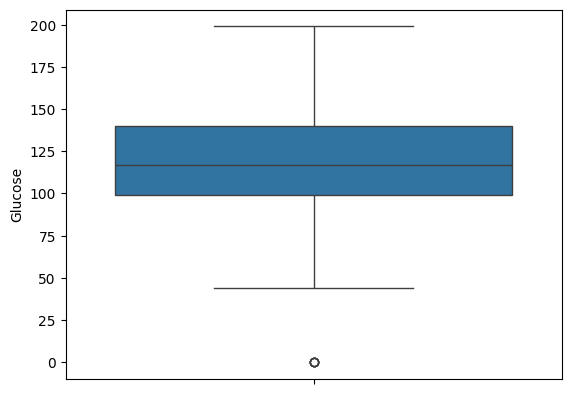

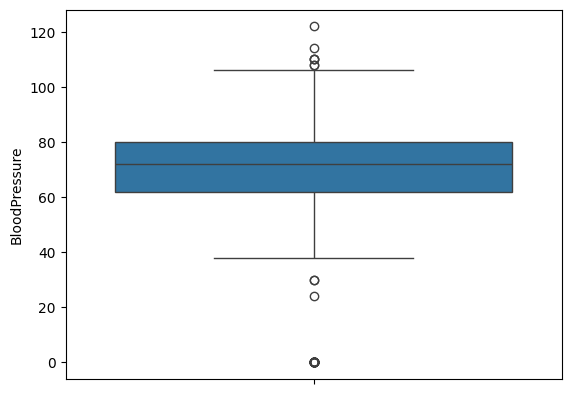

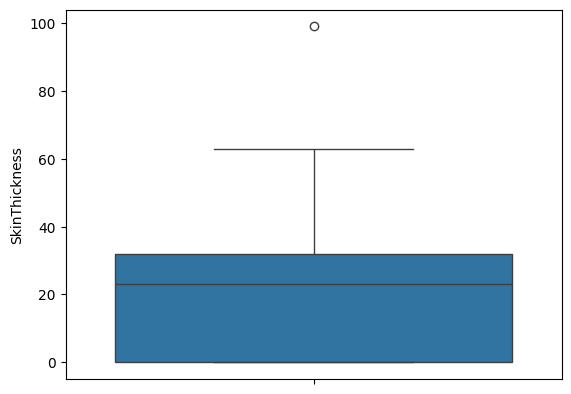

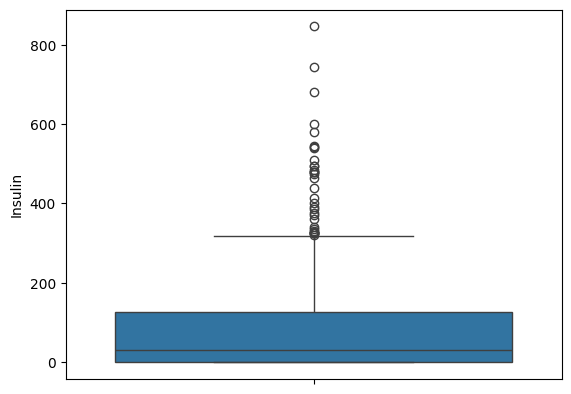

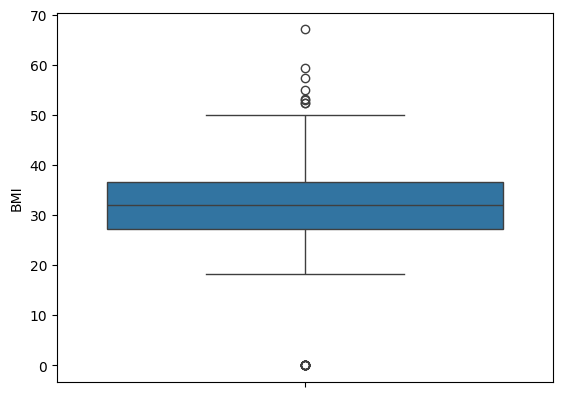

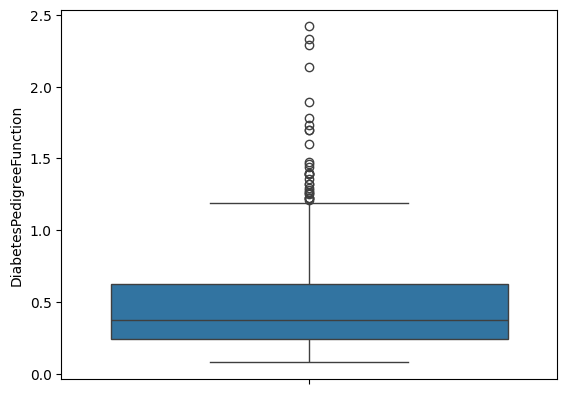

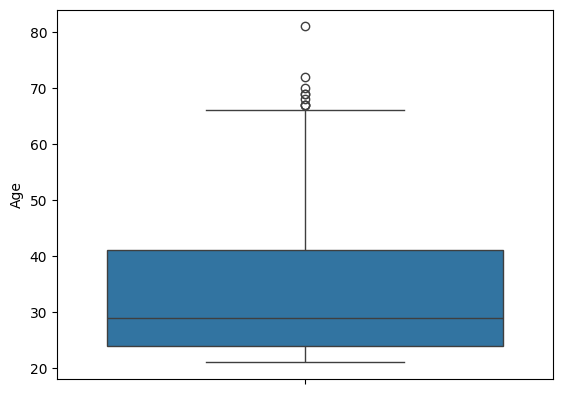

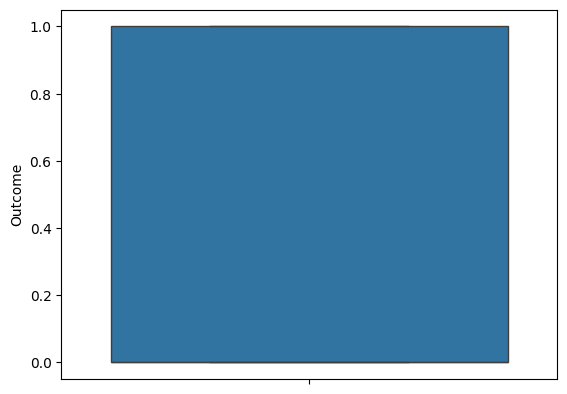

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

In [7]:
for i in df.columns:
  q3= df[i].quantile(0.75)
  q1= df[i].quantile(0.25)
  iqr= q3-q1
  upper= q3+1.5*iqr
  lower= q1-1.5*iqr


In [8]:
for i in df.columns:
  df[i]=df[i].clip(lower,upper)

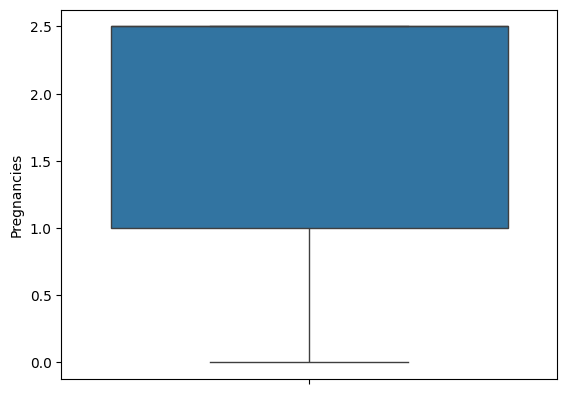

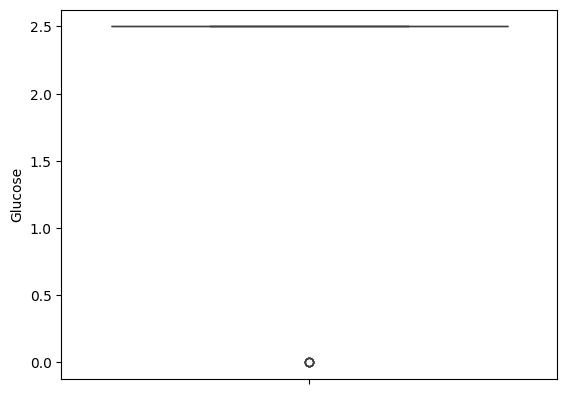

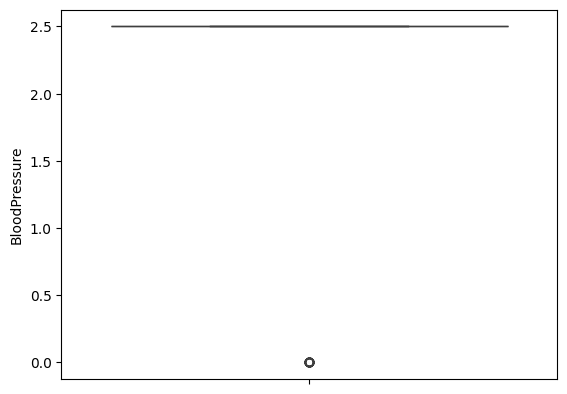

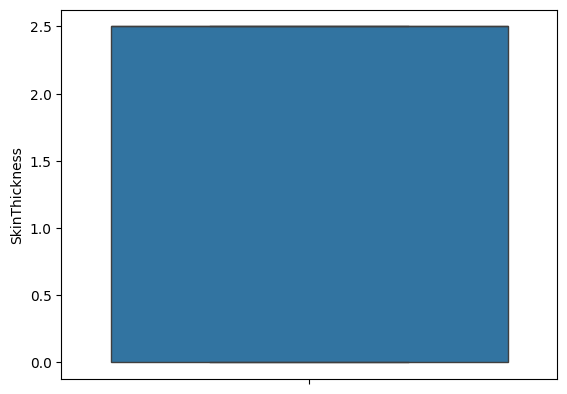

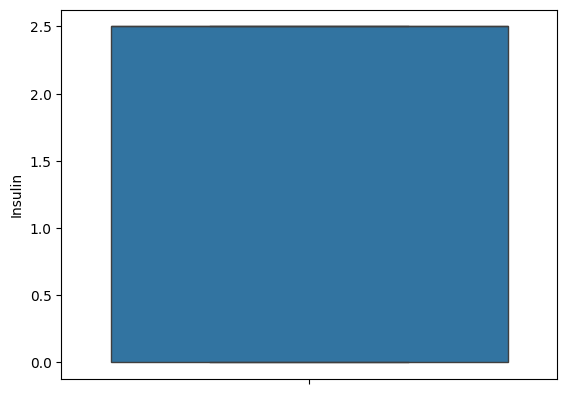

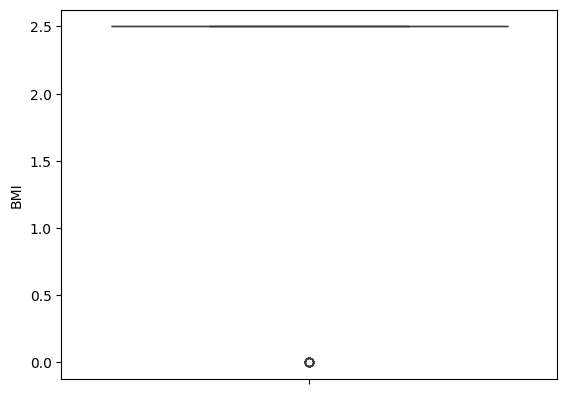

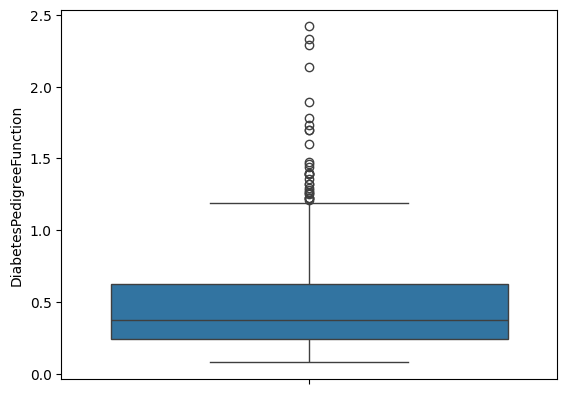

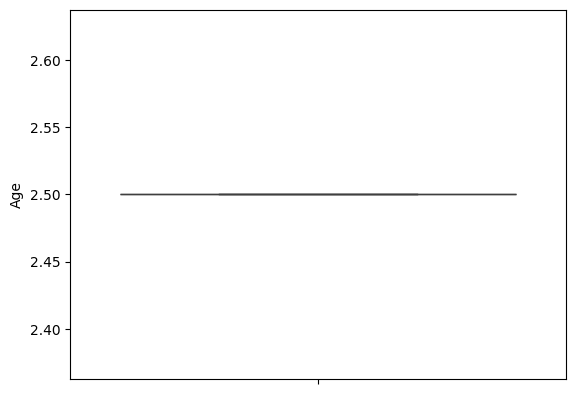

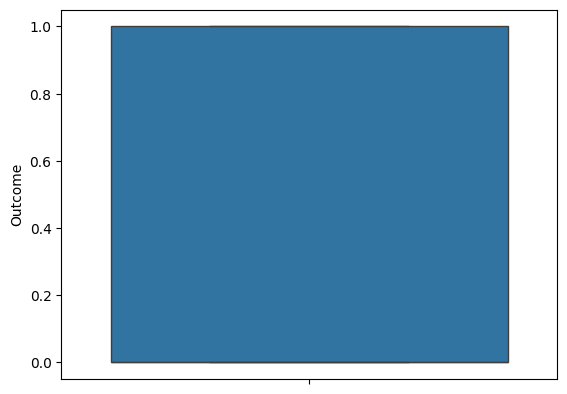

In [9]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])

In [10]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 67.53%


In [19]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[96  3]
 [47  8]]


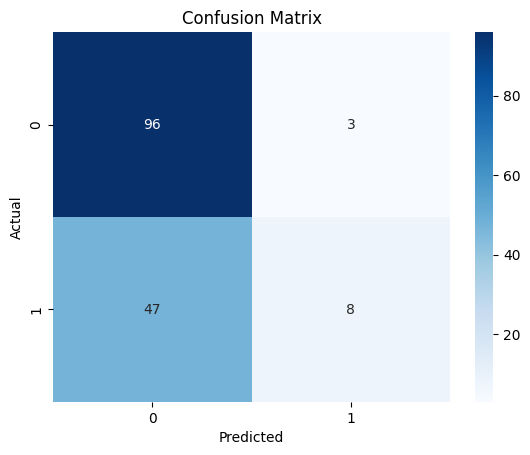

In [20]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        99
           1       0.73      0.15      0.24        55

    accuracy                           0.68       154
   macro avg       0.70      0.56      0.52       154
weighted avg       0.69      0.68      0.60       154



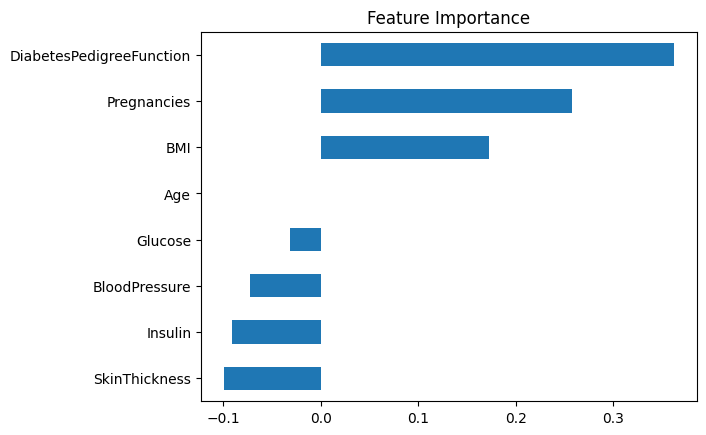

In [22]:
coefficients = pd.Series(model.coef_[0], index=columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()